# Компанейские числа. Исследование

### #Занимательная Математика

#### Весь код на Github, ссылка в конце статьи!

Импорт библиотек

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.interactiveshell import InteractiveShell
from scipy.ndimage.filters import gaussian_filter1d
from scipy.signal import savgol_filter
import numpy as np
import sympy as sp
import pandas as pd
import random as r
import time
import matplotlib.pyplot as plt
import ipyturtle as turtle
InteractiveShell.ast_node_interactivity = "all"

def drawPlot(ss,title="Скорости",y="Секунд",x="Номер итерации"):
    fig,ax=plt.subplots(figsize=(6,6))
    ax.set_facecolor("#F2F2F2")
    ax.grid()
    ax.set_title(title)
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.plot(ss)

In [2]:
Image(url="https://sun9-46.userapi.com/c858036/v858036072/1e3bba/s6JwXFoOgLM.jpg", width=400)

Компанейские числа?  
Прошлая статья была про дружественные числа. Помним что это?  

Если число разложить на его делители, а потом просуммировать их, то выйдет такое число, которое при той же операции вернёт первое число.  
Например:  
Возьмём число 8. Его собственные делители = 4,2,1  
Сумма: 4+2+1 = 7   
Делители семи: 1 и всё. Но 1 + 0, даст 1, а не 8. Поэтому числа 8 и 7 не являются дружественными.  

Первый представитель дружественной пары это - (220,284)   
Проверьте сами.  

Однако должен отметить очень интересный момент по теме. Любой дружественное число ещё является и компанейским. Почему?  
Компанейские числа - это такие числа, которые могут проходить несколько стадий таких вот операций, как описано выше из примера.  
Каждое компанейское число обладает своим порядком, так сказать.  
У дружественных чисел это порядок равен 2. Как понять?  

Создам функцию для нахождения собственных делителей.

In [3]:
def Divisors(num): 
    from math import sqrt as mmsq
    s=set([1])
    i=1
    a=int(mmsq(num)+1)
    while i<=a: 
        if(num//i==num):
            i+=1
            continue
        if (num%i==0): 
            if (num//i!=i): 
                s.add(num//i)
            s.add(i)
        i+=1
    return s

In [4]:
Divisors(220)

{1, 2, 4, 5, 10, 11, 20, 22, 44, 55, 110}

Просуммируем

In [5]:
sum(Divisors(220))

284

Операция проделана всего-то 1 раз.  
из 220 мы получили число 284.  

Повторим алгоритм ещё раз.

In [6]:
Divisors(284)

{1, 2, 4, 71, 142}

In [7]:
sum(Divisors(284))

220

И вот мы вернулись снова к числу 220, которое и было изначально.  
Для этого мы провели нашу операцию два раза! Поэтому порядок - два.  
В википедии это называют длиной последовательности.

Сколько чисел в данной цепи операций кроме изначального

Есть и другие длины. Например если длина будет равна 1, то получается, что у нас сумма собс.делителей числа вернёт сразу его же.   
Такие числа называются **совершенные**, но о них будет статья позже 😁

В целом длины последовательностей могут быть совсем разные.  
От 1 до бесконечности.

Например, возьмём число 1264460

In [8]:
sum(Divisors(1264460))

1547860

In [9]:
sum(Divisors(1547860))

1727636

In [10]:
sum(Divisors(1727636))

1305184

In [11]:
sum(Divisors(1305184))

1264460

И вот мы получили в конце тоже самое число, проделав наш алгоритм 4 раза! Поэтому длина последовательности(порядок, либо период) равен 4

В целом, узнать является ли число компанейским не так уж и быстро. Если конечно мы со временем во всей последовательности получаем единицу, то число ТОЧНО не компанейское. А вдруг вам попадётся число с длиной последовательности, например 999. Это замучаться надо, чтобы дойти до такого.  

Короче говоря, компанейские числа образуют бесконечный цикл при проделывании операции с делителями

Классификация всех известных компанейских чисел 2015 год по длине:

In [12]:
stat=np.array([(1,49),(2,1007478796),(4,1581),(5,1),(6,5),(8,4),(9,1),(28,1)])
pd.DataFrame(stat).rename(columns={0:"Длина последовательности",1:"Количество комп.чисел"})

,Длина последовательности,Количество комп.чисел
0,1,49
1,2,1007478796
2,4,1581
3,5,1
4,6,5
5,8,4
6,9,1
7,28,1


Алгортмы нахождения компанейских чисел.

Первый. Мой. 

In [13]:
def SociableNumber(num,minIt=1,maxIt=20,sequence=False):
    num1=num
    iterat=0
    if(sequence):
        seq=[]
    while iterat<maxIt:
        iterat+=1
        if(sequence):
            seq.append(num)
        
        num = sum(Divisors(num))
        if(num==1):
            return False
        
        if(num1==num):
            if(iterat!=minIt):
                return False
            if(sequence):
                return (num,iterat,seq)
            else:
                return (num,iterat)

Расскажу про него. На вход функции мы подаём число, которое хотим проверить, затем указываем интервал длины последовательности в двух параметрах, и в конце указываем хотим ли вывести все "числа-посредники".

Проверим на числе 4 периода

In [14]:
SociableNumber(1264460,1,sequence=True)

False

In [15]:
SociableNumber(1264460,2,sequence=True)

False

In [16]:
SociableNumber(1264460,3,sequence=True)

False

In [17]:
SociableNumber(1264460,4,sequence=True)

(1264460, 4, [1264460, 1547860, 1727636, 1305184])

И мы видим, что число 1264460 является компанейским числом с периодом 4  

Также, дополнительно я решил посмотреть на ряд чисел-посредников. Всё совершенно верно!

Теперь посмотрим на алгоритм, когда мы не знаем длину последовательности компанейского числа.

In [18]:
def _SociableNumber(num,sequence=False):
    num1=num
    iterat=0
    if(sequence):
        seq=[]
    while True:
        iterat+=1
        if(sequence):
            seq.append(num)
        
        num = sum(Divisors(num))
        if(num==1):
            return False
        
        if(num1==num):
            if(sequence):
                return (num,iterat,seq)
            else:
                return (num,iterat)

In [19]:
_SociableNumber(1264460)

(1264460, 4)

Алгоритм сработал верно и быстро.  
Однако почему вначале я показал не этот алгоритм, и почему текущий не основной?  
Дело в том, что чисто гипотетически можно подать такое число, что оно будет бесконечно искать эти числа. То есть период равен бесконечности. Правда, есть ли такое число? Неизвестно, но пока мы до дойдём до единицы, чтобы доказать всего-то, что число НЕ компанейское пройдёт много времени.   

Хотя мы ещё сравним по скорости все алгоритмы.   
Точнее уже, потому что на этот случай в библиотеке **sympy** нет возможности найти или хотя-бы проверить компанейское число помимо дружественного.

In [20]:
%timeit SociableNumber(1264460,4,sequence=True)

680 µs ± 2.78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%timeit _SociableNumber(1264460)

679 µs ± 2.43 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


В принципе, разницы совсем нет, но немного быстрее выходит метод, когда мы уже знаем период компанейского числа.

In [22]:
InteractiveShell.ast_node_interactivity = "last_expr"

In [23]:
s = np.array([])
for i in range(1,10):
    start_time = time.time()
    _SociableNumber(i)
    end_time = (time.time() - start_time)
    s=np.append(s,end_time)

In [24]:
ss = np.array([])
for i in range(1,10):
    start_time = time.time()
    SociableNumber(i)
    end_time = (time.time() - start_time)
    ss=np.append(ss,end_time)

Можно получить примерные графики скорости выполнения данных программ

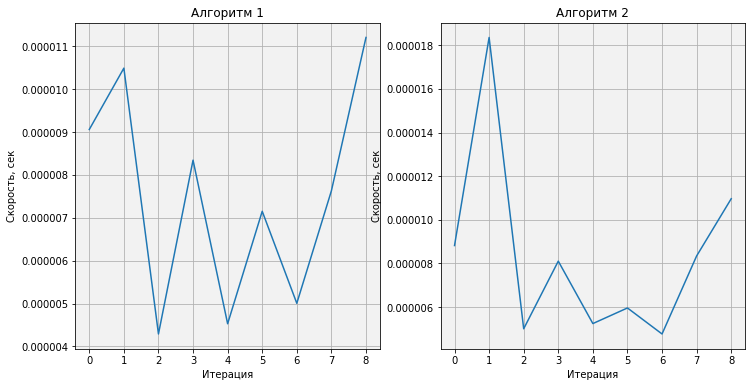

In [25]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].set_facecolor("#F2F2F2")
ax[0].grid()
ax[0].set_title("Алгоритм 1")
ax[0].set_ylabel("Скорость, сек")
ax[0].set_xlabel("Итерация")
ax[0].plot(s)
ax[1].set_facecolor("#F2F2F2")
ax[1].grid()
ax[1].set_title("Алгоритм 2")
ax[1].set_ylabel("Скорость, сек")
ax[1].set_xlabel("Итерация")
ax[1].plot(ss)

Визуально я доказал почему алгоритм проверки работает быстрее алгоритма конкретно нахождения компанейского числа

А давайте сравним скорости выполнения следующих программ:
    1. Поиск компанейских чисел с периодом 2
    2. Поиск дружественного числа

Суть в том, что оба варианта - это дружественные числа, но первый - это новый текущий алгоритм для компанейских чисел в целом, а следующий это алгоритм из предыдущей статьи про дружественные числа

In [26]:
def AmicableNumber(k,returni=False):  
    allDels = dict()
    from itertools import chain
    concatenated = chain( range(k, int(k*1.6)+1 ),range(k, int(k/1.6)+1 ,-1) )
    for i in concatenated:
        if(str(i) not in allDels):
            allDels[str(i)] = Divisors(i)
        if(i != k and sum(allDels[str(i)]) == k and sum(allDels[str(k)]) == i):
            if(returni):
                return (k,i)
            else:
                print(k,"->",i)  

In [27]:
ss = np.array([])
for i in range(200,500):
    start_time = time.time()
    SociableNumber(i,2)
    end_time = (time.time() - start_time)
    ss=np.append(ss,end_time)

In [28]:
s = np.array([])
for i in range(200,500):
    start_time = time.time()
    AmicableNumber(i)
    end_time = (time.time() - start_time)
    s=np.append(s,end_time)

220 -> 284
284 -> 220


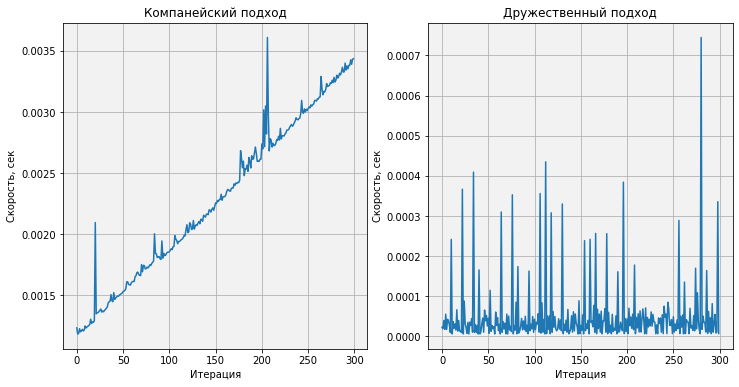

In [29]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].set_facecolor("#F2F2F2")
ax[0].grid()
ax[0].set_title("Компанейский подход")
ax[0].set_ylabel("Скорость, сек")
ax[0].set_xlabel("Итерация")
ax[0].plot(s)
ax[1].set_facecolor("#F2F2F2")
ax[1].grid()
ax[1].set_title("Дружественный подход")
ax[1].set_ylabel("Скорость, сек")
ax[1].set_xlabel("Итерация")
ax[1].plot(ss)

Ожидаемый результат. Если мы ищем компанейские числа, то чем больше число, тем логично нужно больше времени. Но если мы ищем дружественные, то лучше использовать подход изначально сделанный для дружественных чисел, а не абстрактно компанейскийх с 2 периодом.

Теперь попробуем сделать вот что. Попробуем взять первые 26 000 чисел. Из них оставить только компанейские порядка от 1 до 5.  
Мы получим своего рода компанейскую последовательность)

In [30]:
komp=[]
per=[]
for i in range(26000):
    for j in range(1,6):
        if(SociableNumber(i,j)):
            komp.append(i)
            per.append(j)
            break

In [31]:
len(komp)

25

Только 25 компанейских числа из 26 000

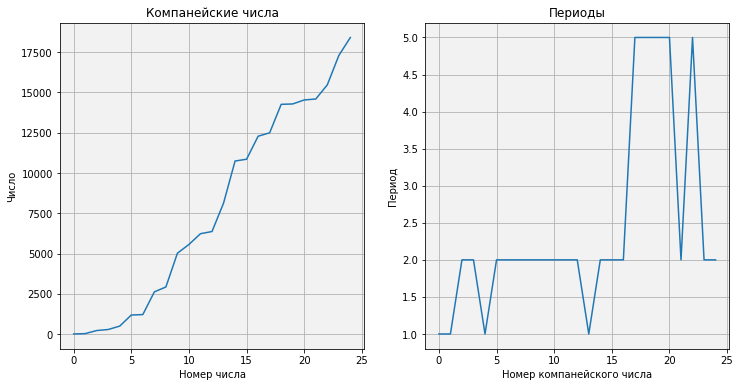

In [32]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].set_facecolor("#F2F2F2")
ax[0].grid()
ax[0].set_title("Компанейские числа")
ax[0].set_ylabel("Число")
ax[0].set_xlabel("Номер числа")
ax[0].plot(komp)
ax[1].set_facecolor("#F2F2F2")
ax[1].grid()
ax[1].set_title("Периоды")
ax[1].set_ylabel("Период")
ax[1].set_xlabel("Номер компанейского числа")
ax[1].plot(per)

Если пренебречь всеми 26 000 чисел и оставить только компанейские то такие графики получаются выше.  
Первое показывает как именно растут компанейские числа. А на втором графике у нас отображаются период соответственно числам первого графика.  

Попробуем узнать частоту компанейских чисел, а также сделать количественную статистику периодов и компанейских чисел среди множества обычных 26 000 чисел.  
Для этого я могу просто взять все эти 26 000 чисел. И отметить точками только компанейские

In [33]:
komp1=[]
komp2=[]
komp3=[]
komp4=[]
komp5=[]
kompa=[]
for i in range(26000):
    if(i in komp):
        kompa.append(1)
        
        if(per[komp.index(i)]==1):
            komp1.append(0.6)
        elif(per[komp.index(i)]==2):
            komp2.append(0.8)
        elif(per[komp.index(i)]==3):
            komp3.append(1)
        elif(per[komp.index(i)]==4):
            komp4.append(1.2)
        elif(per[komp.index(i)]==5):
            komp5.append(1.4)
        
        if(per[komp.index(i)]!=1):
            komp1.append(0)
        if(per[komp.index(i)]!=2):
            komp2.append(0)
        if(per[komp.index(i)]!=3):
            komp3.append(0)
        if(per[komp.index(i)]!=4):
            komp4.append(0)
        if(per[komp.index(i)]!=5):
            komp5.append(0)
    else:
        komp1.append(0)
        komp2.append(0)
        komp3.append(0)
        komp4.append(0)
        komp5.append(0)
        kompa.append(0)

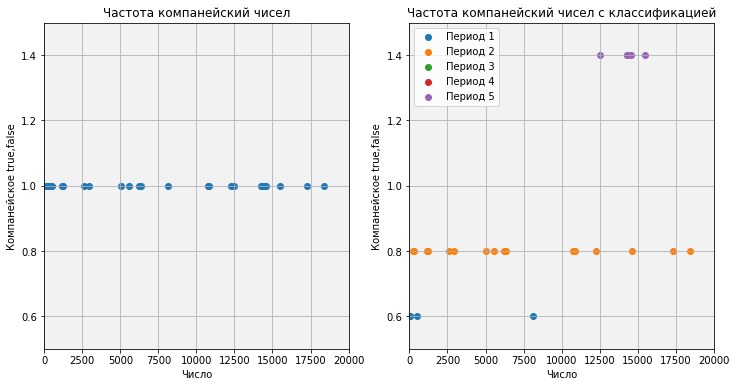

In [34]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].set_ylim([0.5, 1.5])
ax[0].set_xlim([0, 20000])
ax[0].set_facecolor("#F2F2F2")
ax[0].grid()
ax[0].set_title("Частота компанейский чисел")
ax[0].set_xlabel("Число")
ax[0].set_ylabel("Компанейское true,false")
ax[0].scatter(range(26000),kompa)
ax[1].set_ylim([0.5, 1.5])
ax[1].set_xlim([0, 20000])
ax[1].set_facecolor("#F2F2F2")
ax[1].grid()
ax[1].set_title("Частота компанейский чисел с классификацией")
ax[1].set_xlabel("Число")
ax[1].set_ylabel("Компанейское true,false")
ax[1].scatter(range(26000),komp1)
ax[1].scatter(range(26000),komp2)
ax[1].scatter(range(26000),komp3)
ax[1].scatter(range(26000),komp4)
ax[1].scatter(range(26000),komp5)
ax[1].legend(["Период 1","Период 2","Период 3","Период 4","Период 5"])

На первом графике мы видим точки - это компанейские числа. Найти закономерность в частоте не будет легкой задачей, но мы можем их проклассифицировать и узнать к каким периодам они относятся.  
Что и было сделано на втором графике. И мы видим, что точек зелёного и красного цвета нет, а значит в первых 26 000 числах нет компанейских чисел 3 и 4 периода.   
Довольно много дружественных чисел.

''

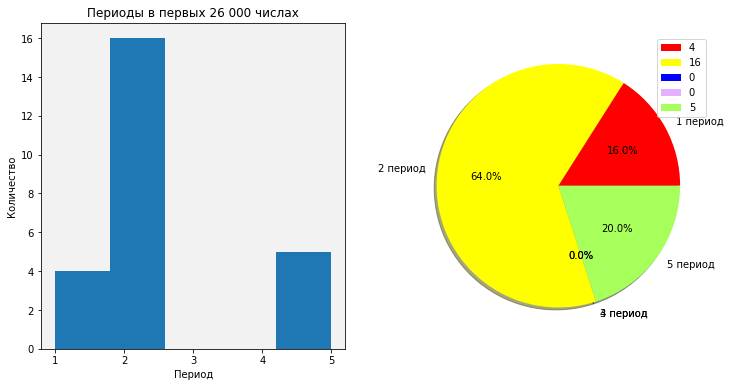

In [35]:
import matplotlib.ticker as ticker
fig,ax=plt.subplots(1,2,figsize=(12,6))
for axis in [ax[0].xaxis, ax[0].yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))
ax[0].set_facecolor("#F2F2F2")
ax[0].set_title("Периоды в первых 26 000 числах")
ax[0].set_xlabel("Период")
ax[0].set_ylabel("Количество")
ax[0].hist(per,bins=5)
plt.pie([per.count(1),per.count(2),per.count(3),per.count(4),per.count(5)], 
        colors=["red","yellow","blue","#E7AFFF","#A7FF5B"],
        labels=["1 период","2 период","3 период","4 период","5 период"], 
        autopct='%1.1f%%',
        shadow=True,
        textprops={'color':"black"})
plt.legend([per.count(1),per.count(2),per.count(3),per.count(4),per.count(5)])
;

Ну, а это классификация компанейских чисел по периоду более наглядно.

А я кстати так и не показал сам ряд компанейских чисел. Первые 25 чисел.

In [36]:
for i in komp:
    print(i,end=", ")

6, 28, 220, 284, 496, 1184, 1210, 2620, 2924, 5020, 5564, 6232, 6368, 8128, 10744, 10856, 12285, 12496, 14264, 14288, 14536, 14595, 15472, 17296, 18416, 

### Анализ

Попробуем проанализировать ряд. Найдём скорость изменения ряда, ускорение. Затем проделаем тоже самое с отношениями между числами и плотностью.

In [37]:
dkomp=[komp[i]-komp[i-1] for i in range(1,len(komp))]
ddkomp=[dkomp[i]-dkomp[i-1] for i in range(1,len(dkomp))]

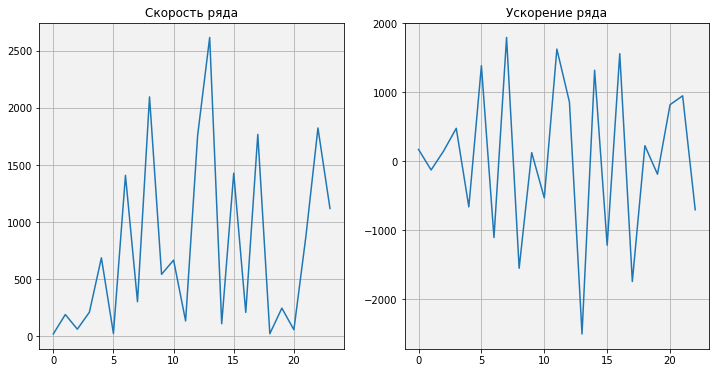

In [38]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].set_facecolor("#F2F2F2")
ax[0].grid()
ax[0].set_title("Скорость ряда")
ax[0].plot(dkomp)
ax[1].set_facecolor("#F2F2F2")
ax[1].grid()
ax[1].set_title("Ускорение ряда")
ax[1].plot(ddkomp)

Да, можно сделать вывод, что вероятность встречи компанейского числа растёт с его ростом, но про ускорение что-либо сказать сложно. Видно, что есть неопределенность. К тому же, компанейские числа включают в себя разные периоды, но первые 25 чисел только 1,2 и 5 периоды.

#### Отношения

In [39]:
rkomp=[komp[i]/komp[i-1] for i in range(1,len(komp))]

In [40]:
np.mean(rkomp) # Среднее соотношение

1.6826428895408647

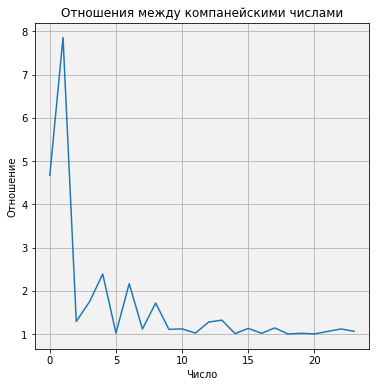

In [41]:
drawPlot(rkomp,title="Отношения между компанейскими числами",y="Отношение",x="Число")

Вау! Я этого не ожидал! Похоже, что ряд отношений сходится к какому-то значению. Могу спрогнозировать, что это происходит уже начиная с 30-ого числа, (но это не точно).  
Для этого было бы полезно узнать скорость и ускорение данного ряда.

In [42]:
drkomp=[rkomp[i]-rkomp[i-1] for i in range(1,len(rkomp))]
ddrkomp=[drkomp[i]-drkomp[i-1] for i in range(1,len(drkomp))]

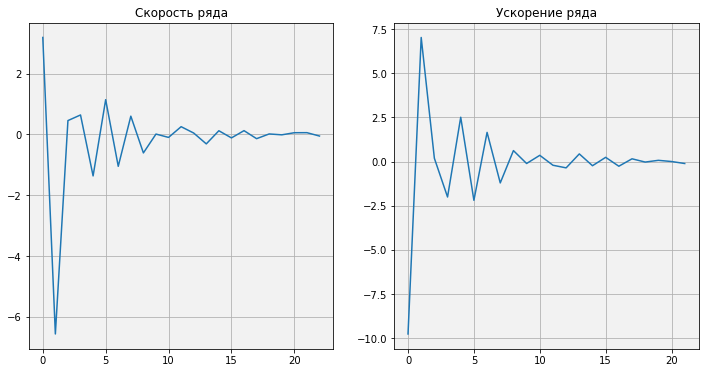

In [43]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].set_facecolor("#F2F2F2")
ax[0].grid()
ax[0].set_title("Скорость ряда")
ax[0].plot(drkomp)
ax[1].set_facecolor("#F2F2F2")
ax[1].grid()
ax[1].set_title("Ускорение ряда")
ax[1].plot(ddrkomp)

😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍

Замечательно!!!  

Скорость и ускорения схожи, а так же оба графика сходятся. Этим можно сделать вывод, что мы сможем генерировать компанейские числа по формуле, если узнаем точное отношение чисел.

#### Плотность

Как и в прошлых статьях, мы исследуем компанейские числа на свойство плотности. Узнаем также скорость и ускорение плотностей.

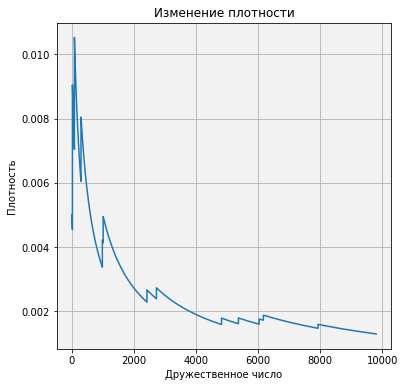

In [44]:
densities=[(len(list(filter(lambda x: x < i, sorted(komp))))-1)/i for i in range(200,10000)]
drawPlot(densities,"Изменение плотности","Плотность","Дружественное число")

Плотность компанейских чисел значительно уменьшается со временем. Можно даже выявить тренд, и понять что за функция.

Функция $ {f(x)}={{1}\over{x}} , x \in (0,\inf) $

In [45]:
ddensities=[densities[i]-densities[i-1] for i in range(1,len(densities))]
ddensities=[ddensities[i]-ddensities[i-1] for i in range(1,len(ddensities))]

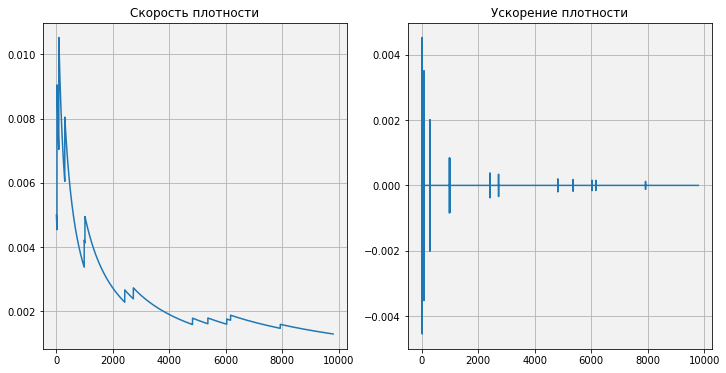

In [46]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].set_facecolor("#F2F2F2")
ax[0].grid()
ax[0].set_title("Скорость плотности")
ax[0].plot(densities)
ax[1].set_facecolor("#F2F2F2")
ax[1].grid()
ax[1].set_title("Ускорение плотности")
ax[1].plot(ddensities)

Супер зрелище! Я ещё раз убедился, что можно попробовать генерировать компанейские числа.   
А давайте попробуем?

In [47]:
def findSociableNumbers(countt):
    komp=[]
    per=[]
    i=0
    while len(komp)<countt:
        i+=1
        for j in range(1,6):
            if(SociableNumber(i,j)):
                komp.append(i)
                per.append(j)
                break
    return (komp,per)
            
komp=findSociableNumbers(30)[0]

In [48]:
rkomp=[komp[i]/komp[i-1] for i in range(1,len(komp))]

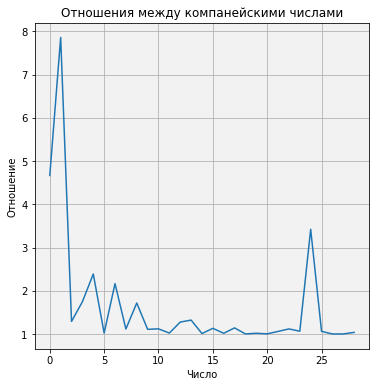

In [49]:
drawPlot(rkomp,title="Отношения между компанейскими числами",y="Отношение",x="Число")

Упс. А вот вроде всё сходилось, в процессе резко поднялось значение.  План провален, однако...  
Найдём отношение компанейских чисел

In [50]:
ratio=rkomp[-1]
ratio

1.0375586854460095

А теперь при помощи итерации попробуем сгенерировать потенциальные компанейские числа

In [51]:
gkomp=komp.copy()
i=0
while i<570:
    gkomp.append(int(ratio*gkomp[-1]))
    i+=1
gkomp

[6,
 28,
 220,
 284,
 496,
 1184,
 1210,
 2620,
 2924,
 5020,
 5564,
 6232,
 6368,
 8128,
 10744,
 10856,
 12285,
 12496,
 14264,
 14288,
 14536,
 14595,
 15472,
 17296,
 18416,
 63020,
 66928,
 66992,
 67095,
 69615,
 72229,
 74941,
 77755,
 80675,
 83705,
 86848,
 90109,
 93493,
 97004,
 100647,
 104427,
 108349,
 112418,
 116640,
 121020,
 125565,
 130281,
 135174,
 140250,
 145517,
 150982,
 156652,
 162535,
 168639,
 174972,
 181543,
 188361,
 195435,
 202775,
 210390,
 218291,
 226489,
 234995,
 243821,
 252978,
 262479,
 272337,
 282565,
 293177,
 304188,
 315612,
 327465,
 339764,
 352525,
 365765,
 379502,
 393755,
 408543,
 423887,
 439807,
 456325,
 473463,
 491245,
 509695,
 528838,
 548700,
 569308,
 590690,
 612875,
 635893,
 659776,
 684556,
 710267,
 736943,
 764621,
 793339,
 823135,
 854050,
 886126,
 919407,
 953938,
 989766,
 1026940,
 1065510,
 1105529,
 1147051,
 1190132,
 1234831,
 1281209,
 1329329,
 1379256,
 1431059,
 1484807,
 1540574,
 1598435,
 1658470,
 17

Сколько из них настоящих компанейских чисел можно узнать только, если мы сравним с уже точно известным рядом. Здесь показано 600 чисел

## Статистика

In [52]:
len(komp)

30

За 12 минут я нашёл 30 компанейских чисел

А самое последнее, большее число - 69615

In [53]:
EvenSociable=[i for i in komp if(i%2==0)]
len(EvenSociable)

26

''

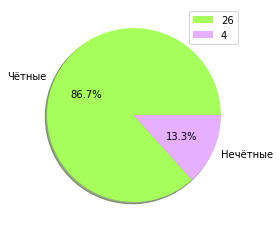

In [54]:
plt.pie([len(EvenSociable),30-len(EvenSociable)], 
        colors=["#A7FF5B","#E7AFFF"],
        labels=["Чётные","Нечётные"], 
        autopct='%1.1f%%',
        shadow=True,
        textprops={'color':"black"})
plt.legend([len(EvenSociable),30-len(EvenSociable)])
;

Из 30 чисел только 4 нечётные!

Исследуем теперь на простоту!

In [55]:
def _isPrime(n):
    if n%2==0:
        return n==2
    d=3
    while d*d<=n and n%d!=0:
        d+=2
    return d*d>n   

''

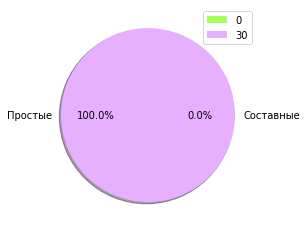

In [56]:
PrimeSociable=[i for i in komp if(_isPrime(i))]
plt.pie([len(PrimeSociable),30-len(PrimeSociable)], 
        colors=["#A7FF5B","#E7AFFF"],
        labels=["Составные","Простые"], 
        autopct='%1.1f%%',
        shadow=True,
        textprops={'color':"black"})
plt.legend([len(PrimeSociable),30-len(PrimeSociable)])
;

Как и в случае с дружественными числами, здесь тоже ни одного простого!

## Визуализация

Попробуем нарисовать спирали со средним и последним углом в ряду из 30 компанейских чисел

In [57]:
ratio=[komp[i]/komp[i-1] for i in range(1,len(komp))]

In [58]:
ratio[-1]

1.0375586854460095

In [59]:
np.mean(ratio)

1.6519833851472943

In [60]:
angle=sp.N(360/np.mean(ratio)**2)
angle

131.914079291008

In [61]:
#Создаём картинку 300х300

N=300
t = turtle.Turtle(fixed=False, width=N, height=N)
t.hideturtle()
t

Turtle()

In [62]:
for i in range(15):
    for j in range(int(angle)): 
        t.forward(i/10) 
        t.left(1)
        if(i>10):
            time.sleep(0.01) # Чтобы не терять рисунок

In [63]:
angle=sp.N(360/ratio[-1]**2)
angle

334.408386396675

In [64]:
#Создаём картинку 300х300

N=300
t = turtle.Turtle(fixed=False, width=N, height=N)
t.hideturtle()
t

Turtle()

In [65]:
for i in range(15):
    for j in range(int(angle)): 
        t.forward(i/10) 
        t.left(1)
        if(i>10):
            time.sleep(0.01) # Чтобы не терять рисунок

# Конец  

На этом всё, дорогие читатели!  
Надеюсь вам было интересно узнать что-то вроде такого из занимательной математики 😍

Следующая статья скорее всего про совершенство чисел. Будет большая статья. Даже очень. К тому же, у меня есть несколько проектов, поэтому следующая статья будет совсем не скоро, но будет!

---

Здесь ссылка на датасеты компанейских чисел
[Компанейские числа](https://github.com/lonagi/pysasha/blob/master/datasets/Number%20Theory/Sociable%20Numbers/SociableeNumbers_30.csv)  

Датасет состоит из двух столбиков. Компанейское число и его период. А на момент написания статьи, чисел там 30.

Если есть желание прочитать статью на другом источнике, то пожалуйста, вот ниже ссылки:
    
[ВКонтакте](vk.com/@lonagi-kompaneiskie-chisla-issledovanie)  
[Instagram]()    
[Facebook](https://www.facebook.com/%D0%97%D0%B0%D0%BD%D0%B8%D0%BC%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F-%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0-%D0%BE%D1%82-Lonagi-112410007105730)    
[Github](https://github.com/lonagi/pysasha/blob/master/docs/Number%20Theory/Sociable%20Numbers/SociableNumbers.md)  